# Simplex embedding 

In [ ]:
#| default_exp simplex_embedding

## Introduction: First Pass

In [ ]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

Consider the following four points
\begin{align}
s_1 = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} &&
s_2 = \begin{pmatrix} 1 \\ 1 \\ -1 \end{pmatrix} &&
s_3 = \begin{pmatrix} 1 \\ -1 \\ -1 \end{pmatrix} &&
s_4 = \begin{pmatrix} 1 \\ -1 \\ 1 \end{pmatrix},
\end{align}
which we'll arrange into the columns of a matrix $\textbf{S}$:
\begin{align}
\textbf{S} = \begin{pmatrix} 
1 & 1 & 1 & 1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1 
\end{pmatrix}.
\end{align}

In [ ]:
S = np.array([[1,1,1,1],\
              [1,1,-1,-1],\
              [1,-1,-1,1]])

Let's have a look at our points:

In [ ]:
#| export
import matplotlib.pyplot as plt

def quick_plot_3d_pts(*P):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    c = ["r", "g", "b", "y"]
    for i, p in enumerate(P):
        ax.scatter(p[0], p[1], p[2], c=c[i])
    ax.scatter(0,0,0,c="black")
    plt.show()

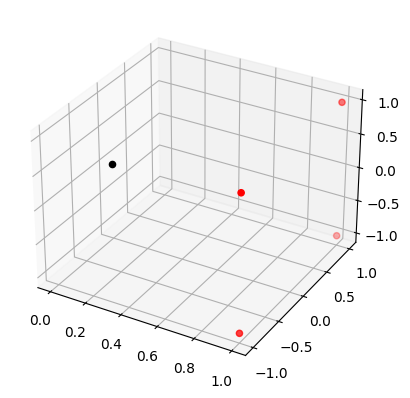

In [ ]:
quick_plot_3d_pts(S)

They form a square.

We'll call the *accessible state cone* any non-negative mixture of these vertices. 

\begin{align}
\text{cone}(\textbf{S}) = \Big\{ |s) \ \Big| \ |s) = \textbf{S}p, p \ge 0 \Big\}
\end{align}

If in particular $\sum_i p_i = 1$, then $|s)$ will be a convex combination of the vertices (extreme points): a normalized state, which will live inside the square. Otherwise, the unnormalized state will live in the cone which passes through the square whose base is the origin.

We can also represent the *accessible state space*--the square itself--not in terms of its vertices, but in terms of the inequalities its interior points satisfy, i.e. its halfspaces. 

Just by inspection, it is clear that we want:
\begin{align}
|s) =
\begin{pmatrix} 
1 \\ 
-1 \le y \le 1 \\ 
-1 \le z \le 1  
\end{pmatrix},
\end{align}
which we can write in terms of inner products:
\begin{align}
\begin{pmatrix} 1 & 1 & 0 \end{pmatrix}
\begin{pmatrix}1 \\ y \\ z \end{pmatrix} \ge 0 &\Rightarrow 1 + y \ge 0 \Rightarrow y \ge -1\\
\begin{pmatrix} 1 & -1 & 0 \end{pmatrix}
\begin{pmatrix}1 \\ y \\ z \end{pmatrix} \ge 0 &\Rightarrow 1 - y \ge 0  \Rightarrow 1 \ge y\\
\begin{pmatrix} 1 & 0 & 1 \end{pmatrix}
\begin{pmatrix}1 \\ y \\ z \end{pmatrix} \ge 0  &\Rightarrow 1 + z \ge 0  \Rightarrow z \ge -1 \\
\begin{pmatrix} 1 & 0 & -1 \end{pmatrix}
\begin{pmatrix}1 \\ y \\ z \end{pmatrix} \ge 0  &\Rightarrow 
1 - z \ge 0 \Rightarrow  1 \ge z
\end{align}
In other words, gathering up these vectors as the rows of a matrix $H_S$, we have
\begin{align}
\textbf{S}^* =\begin{pmatrix} 
1 & 1 & 0 \\
1 & -1 & 0 \\
1 & 0 & 1 \\
1 & 0 & -1
\end{pmatrix},
\end{align}
such that we have a valid state if 
\begin{align}
\textbf{S}^* |\rho) \ge 0.
\end{align}

We can see that in fact the rows of $\textbf{S}^*$ gives us the polygon *dual* to the columns of $\textbf{S}$: facets are taken to vertices and vice versa.

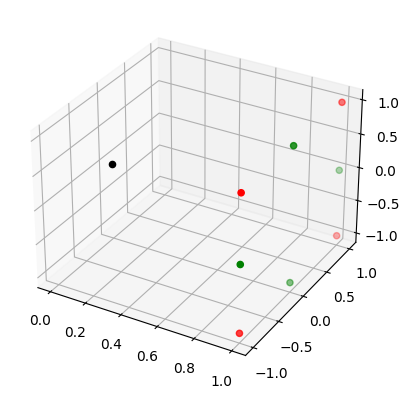

In [ ]:
S_star = np.array([[1,1,0],\
                   [1,-1,0],\
                   [1,0,1],\
                   [1,0,-1]])
quick_plot_3d_pts(S, S_star.T)

Another way of seeing this is to consider the following definition:

\begin{align}
\text{cone}^*(\textbf{S}) = \Big\{ (e| \ \Big| \ (e|\textbf{S} \ge 0 \Big\}
\end{align}

This gives us:
\begin{align}
\begin{pmatrix}x & y & z \end{pmatrix}
\begin{pmatrix} 
1 & 1 & 1 & 1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1 
\end{pmatrix} \ge 0
\end{align}
Or:
\begin{align}
x+y+z &\ge 0 \Rightarrow y + z \ge -x \\
x+y-z &\ge 0 \Rightarrow y -z \ge -x \\
x-y-z &\ge 0 \Rightarrow x \ge y + z \\
x-y+z &\ge 0 \Rightarrow x \ge y - z
\end{align}
And even more compactly:
\begin{align}
-x \le y + z \le x \\
-x \le y - z \le x
\end{align}
Consider just the slice where $x=1$. We then have:
\begin{align}
z \le 1 - y && -1 -y \le z \\
y - 1 \le z && z \le 1+y
\end{align}
In the case of equality:
\begin{align}
(a) \ z = 1-y && (b) \ z= -1 -y \\
(c) \ z= y-1 && (d) \ z= 1+y
\end{align}

Concretely:

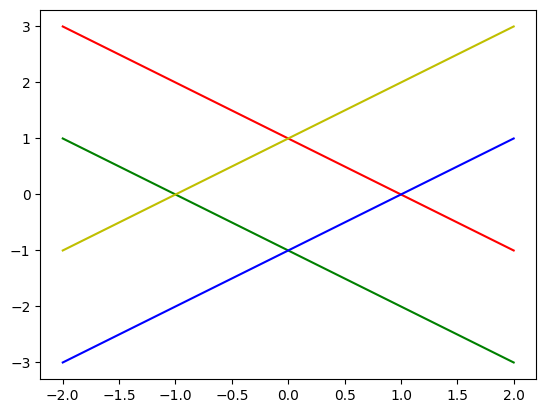

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
y = np.linspace(-2,2,10)
ax.plot(y, 1-y, c="r")
ax.plot(y, -1-y, c="g")
ax.plot(y, y-1, c="b")
ax.plot(y, 1+y, c="y")
plt.show()

Clearly, $(a)$ and $(d)$ intersect at $(1,0,1)$, $(a)$ and $(c)$ intersect at $(1,1,0)$, $(b)$ and $(c)$ intersect at $(1,0,-1)$, and $(b)$ and $(d)$ intersect at $(1,-1,0)$. Indeed, this is just our matrix $\textbf{S}^*$.

Let
\begin{align}
\textbf{E} = \frac{1}{4} \begin{pmatrix} 
1 & 1 & 0 \\
1 & -1 & 0 \\
1 & 0 & 1 \\
1 & 0 & -1
\end{pmatrix}
\end{align}
so that $\sum_i (E_i| = (1,0,0) = (I|$, and thus this counts as a measurement: we have 

$$\sum_i P(E_i|S) = \sum_i (E_i|S) = (I|S) = 1.$$

where $(I|$ is the normalization functional: it gives 1 on all normalized states.

In [ ]:
E = S_star/4
P = E @ S; P

array([[0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0.5],
       [0.5, 0. , 0. , 0.5],
       [0. , 0.5, 0.5, 0. ]])

Putting it one way, $\textbf{E}|s) \ge 0$ for valid states: putting it another way, $(e|\textbf{S} \ge 0$ for valid effects.

The question is: can we find some $\Phi$ which is entrywise positive such that

\begin{align}
(e|\textbf{S} \Phi \textbf{E} |\rho) &= (e|\rho)\\
\textbf{ES} \Phi \textbf{ES} &= \textbf{ES}\\
P \Phi P &= P
\end{align}
where $P = \textbf{ES}$ is a conditional probability matrix. 

Note that the last condition $P\Phi P = P$ is the condition for a $\{1\}$-inverse of $P$. 

Clearly, we can if we don't demand positivity:

In [ ]:
import cvxpy as cp

Phi_ = cp.Variable((S.shape[1], E.shape[0]))
problem = cp.Problem(cp.Minimize(cp.norm(S @ Phi_ @ E - np.eye(E.shape[1]))))
problem.solve()
Phi = Phi_.value; Phi

array([[ 0.75, -0.25,  0.75, -0.25],
       [ 0.75, -0.25, -0.25,  0.75],
       [-0.25,  0.75, -0.25,  0.75],
       [-0.25,  0.75,  0.75, -0.25]])

In [ ]:
S @ Phi @ E

array([[ 1.,  0.,  0.],
       [-0.,  1., -0.],
       [ 0.,  0.,  1.]])

But otherwise?

In [ ]:
Phi_ = cp.Variable((S.shape[1], E.shape[0]), nonneg=True)
problem = cp.Problem(cp.Minimize(cp.norm(S @ Phi_ @ E - np.eye(E.shape[1]))))
problem.solve()
Phi = Phi_.value; Phi

array([[0.667, 0.   , 0.667, 0.   ],
       [0.667, 0.   , 0.   , 0.667],
       [0.   , 0.667, 0.   , 0.667],
       [0.   , 0.667, 0.667, 0.   ]])

In [ ]:
S @ Phi @ E

array([[ 1.333, -0.   , -0.   ],
       [ 0.   ,  0.667,  0.   ],
       [-0.   , -0.   ,  0.667]])

What if, however, we relax our condition and allow the identity to be "depolarized"? In other words, we'd like to find a $\Phi$ such that $p$ is minimized in

\begin{align}
\text{min}_p \text{ s. t. } p|M)(M| + (1-p) I = \textbf{S} \Phi \textbf{E}
\end{align}

where $|M)$ is a choice of maximally mixed state, here given by $(I|$.

In [ ]:
I = np.eye(3)[0]
p_, Phi_ = cp.Variable(nonneg=True),\
           cp.Variable(shape=(S.shape[1], E.shape[0]), nonneg=True)
problem = cp.Problem(cp.Minimize(p_),\
           [p_*np.outer(I,I) + (1-p_)*np.eye(E.shape[1]) - S @ Phi_ @ E == 0])
problem.solve()
p, Phi = p_.value, Phi_.value; p, Phi

(0.5000000000359306,
 array([[0.5, 0. , 0.5, 0. ],
        [0.5, 0. , 0. , 0.5],
        [0. , 0.5, 0. , 0.5],
        [0. , 0.5, 0.5, 0. ]]))

We then have that

\begin{align}
P(E|\lambda) = \textbf{ES}\Phi && P(\lambda |S) = \textbf{ES}
\end{align}

is an ontological model for our depolarized theory, and $p$ is a measure of how nonclassical the original theory was.

In [ ]:
PE, PS = E @ S @ Phi, E @ S; PE, PS

(array([[0.5 , 0.  , 0.25, 0.25],
        [0.  , 0.5 , 0.25, 0.25],
        [0.25, 0.25, 0.5 , 0.  ],
        [0.25, 0.25, 0.  , 0.5 ]]),
 array([[0.5, 0.5, 0. , 0. ],
        [0. , 0. , 0.5, 0.5],
        [0.5, 0. , 0. , 0.5],
        [0. , 0.5, 0.5, 0. ]]))

In [ ]:
PE @ PS, E @ S

(array([[0.375, 0.375, 0.125, 0.125],
        [0.125, 0.125, 0.375, 0.375],
        [0.375, 0.125, 0.125, 0.375],
        [0.125, 0.375, 0.375, 0.125]]),
 array([[0.5, 0.5, 0. , 0. ],
        [0. , 0. , 0.5, 0.5],
        [0.5, 0. , 0. , 0.5],
        [0. , 0.5, 0.5, 0. ]]))

## More Systematically

Let's now approach the question more systematically, following primarily https://arxiv.org/abs/2204.11905. 

Before we begin, let's lay out some examples of "GPT fragments" for later use.

## Examples

In [ ]:
import cdd
import scipy as sc

In [ ]:
#| export
from qbuki import gellmann_basis

# Here we use Gellmann matrices to convert quantum states and effects into Bloch vectors.
def hilbert_to_gpt(states, effects):
    d = states[0].shape[0]
    basis = gellmann_basis(d)
    to_gellmann = lambda O: np.array([(O@b).trace() for b in basis[::-1]])
    from_gellman = lambda o: sum([c*basis[d**2-i] for i, c in enumerate(o)])
    return np.array([to_gellmann(o, basis) for o in states]).T.real,\
           np.array([to_gellmann(o, basis) for o in effects]).real,\
                     to_gellmann(np.eye(d), basis).real,\
                     to_gellmann(np.eye(d)/d, basis).real

In [ ]:
#| export
def example1_gpt():
    Zup, Zdown = np.array([1,0]), np.array([0,1])
    Xup, Xdown = np.array([1,1])/np.sqrt(2), np.array([1,-1])/np.sqrt(2)
    s = [np.outer(s, s.conj()) for s in [Zup, Zdown, Xup, Xdown]]
    e = [_/2 for _ in s]
    return hilbert_to_gpt(s, e)

In [ ]:
#| export
def example2_gpt():
    return np.array([[1,0,0,0],\
                     [0,1,0,0],\
                     [0,0,1,0],\
                     [0,0,0,1]]),\
           np.array([[1,1,0,0],
                     [0,1,1,0],\
                     [0,0,1,1],\
                     [1,0,0,1]])/2,\
           np.array([1,1,1,1]),\
           np.mean(S, axis=1)

In [ ]:
#| export
def boxworld_gpt():
    return np.array([[1,1,0],\
                     [1,0,1],\
                     [1,-1,0],\
                     [1,0,-1]]).T,\
           np.array([[1,-1,-1],\
                     [1,1,-1],\
                     [1,1,1],\
                     [1,-1,1]])/4,\
           np.array([1,0,0]),\
           np.array([1,0,0])

In [ ]:
#| export
from qbuki import rand_stochastic 

def rand_classical_gpt(n, r):
    E,S = rand_stochastic(n, r), rand_stochastic(r, n)
    return S, E, np.ones(r), np.ones(r)/r

In [ ]:
#| export
from qbuki import rand_povm, rand_dm

def rand_quantum_gpt(d, n):
    return hilbert_to_gpt([rand_dm(d) for i in range(n)], rand_povm(d,n))

In [ ]:
#| export
from qbuki import sic_povm

def sic_gpt(d):
    return hilbert_to_gpt([e/e.trace() for e in sic_povm(d)], sic_povm(d))

In [ ]:
#| export
from qbuki import prime_mubs

def mub_gpt(d):
    mubs = prime_mubs(d)
    mub_vecs = [v for mub in mubs for v in mub]
    S = [np.outer(v, v.conj()) for v in mub_vecs]
    E = [s/len(mubs) for s in S]
    return hilbert_to_gpt(S, E)

In [ ]:
#| export
def polygonal_states(n):
    w = np.exp(2*np.pi*1j/n)
    return np.array([[1, (w**i).real, (w**i).imag] for i in range(n)]).T

def dualize_states(S, backend="qhull"):
    if backend == "qhull":
        if S.shape[0] == 2:
            return np.array([[-np.min(S[1:]), 1],[np.max(S[1:]), -1]])
        hull = sc.spatial.ConvexHull(S.T[:,1:])
        eq = hull.equations
        A, b = eq[:,:-1], eq[:, -1]
        w = b/S[0,hull.vertices]
        return -np.hstack([w.reshape(w.shape[0],1), A])
    elif backend == "cdd":
        C = cdd.Matrix(S.T, number_type="float")
        C.rep_type = cdd.RepType.GENERATOR
        return np.array(cdd.Polyhedron(C).get_inequalities())

def polygonal_gpt(n):
    S = polygonal_states(n)
    e = dualize_states(S)
    E = e/np.sum(e, axis=0)[0]
    return S, E, np.eye(3)[0], np.eye(3)[0]

## Simplicial Embedding Algorithm: Input

We begin with 

1. A matrix $\textbf{S}$ whose columns are GPT states.
2. A matrix $\textbf{E}$ whose rows are GPT effects.
3. A normalization functional $(I|$ such that $(I|S_i)=1 \ \forall i$.
4. A maximally mixed state $|M)$.

In [ ]:
S, E, I, M = boxworld_gpt()
print("states:\n%s\n\neffects:\n%s\n\n(I|: %s\n\n|M): %s" % (S, E, I, M))

states:
[[ 1  1  1  1]
 [ 1  0 -1  0]
 [ 0  1  0 -1]]

effects:
[[ 0.25 -0.25 -0.25]
 [ 0.25  0.25 -0.25]
 [ 0.25  0.25  0.25]
 [ 0.25 -0.25  0.25]]

(I|: [1 0 0]

|M): [1 0 0]


<IPython.core.display.Javascript object>


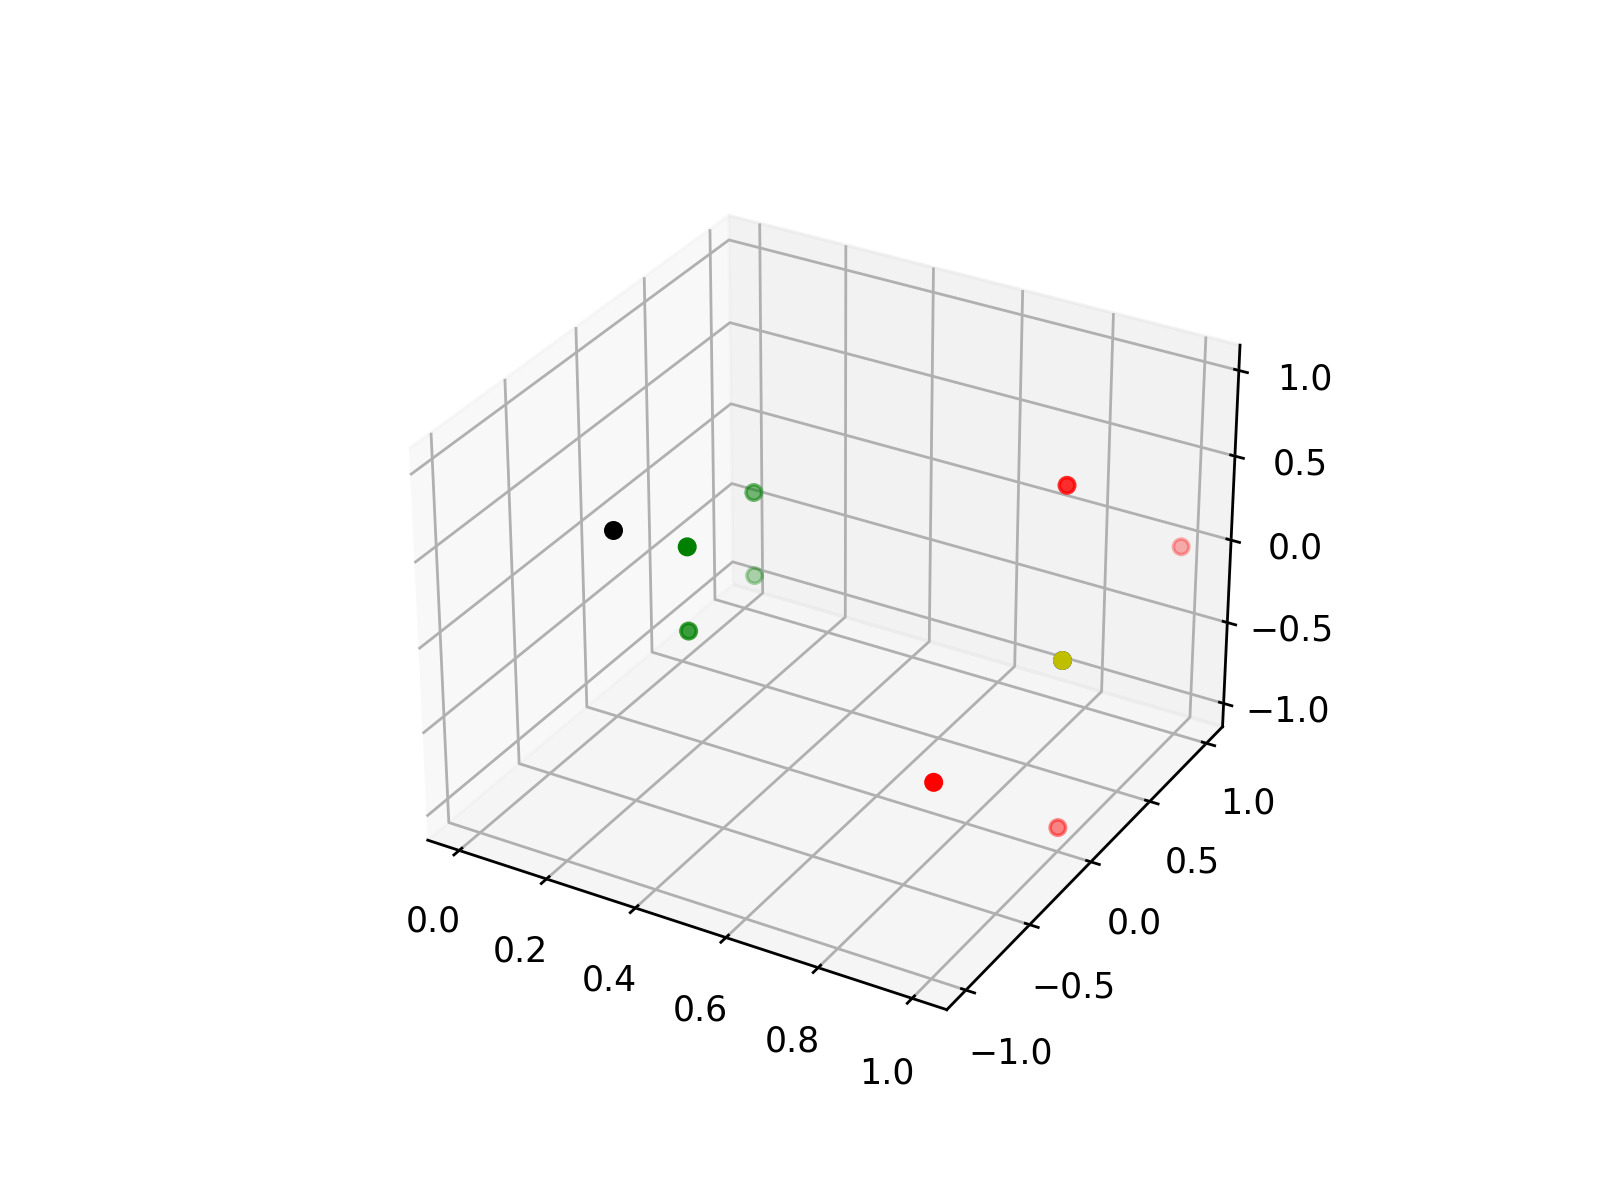

In [ ]:
%matplotlib notebook
if S.shape[0] == 3:
    quick_plot_3d_pts(S, E.T, I, M)

## Constructing the accessible fragment

Suppose we have a set of $n$ states in $\mathbb{R}^d$ given as columns of an $d \times n$ matrix $\textbf{S}$.

Suppose $\textbf{S}$ is rank $r$. If we take the SVD, $\textbf{S} = UDV^\dagger$, then $D$ will be a diagonal matrix with the $r$ singular values along the diagonal followed by 0's. Moreover, the columns of $U$ form an orthonormal basis for the column space of $\textbf{S}$. If we take the first $r$ columns of $U$ and transpose them, we obtain a matrix $\blacktriangleleft_S$ such that

\begin{align}
|s) = \blacktriangleleft_S |S)
\end{align}

where $s$ is an $r$ dimensional column vector which we'll call the *accessible state* corresponding to $|S)$. Moreover, let $\blacktriangleright_S = \blacktriangleleft_S^T$. Then:

\begin{align}
|S) = \blacktriangleright_S|s) = \blacktriangleright_S \blacktriangleleft_S |S)
\end{align}

Whereas multiplying by $\blacktriangleleft_S$ expands $|S)$ in the orthonormal basis, multiplying by $\blacktriangleright_S$ takes a linear combination of the basis vectors weighted by the elements of $|s)$, which takes us back to where we began.

In [ ]:
#| export
def tinyfier(X):
    U, D, V = np.linalg.svd(X)
    r = np.isclose(D, 0).argmax(axis=0)
    return U[:,:r if r != 0 else D.shape[0]].T

In [ ]:
bigToSmallStates = tinyfier(S)

print("|S0): %s" % (S[:,0]))
print("|s0): %s" % (bigToSmallStates @ S[:,0]))
print("|S0): %s" % (bigToSmallStates.T @ bigToSmallStates @ S[:,0]))

|S0): [1 1 0]
|s0): [1. 1. 0.]
|S0): [1. 1. 0.]


Similarly, we'll find a matrix $\blacktriangleright_E$ such that

\begin{align}
(E| \blacktriangleright_E = |e).
\end{align}

But since $\textbf{E}$ consists of the effects as rows, we'll transpose to make them columns, and then transpose the result to get $\blacktriangleright_E$.

In [ ]:
bigToSmallEffects = tinyfier(E.T).T

print("(E0|: %s" % (E[0,:]))
print("(e0|: %s" % (E[0,:] @ bigToSmallEffects))
print("(E0|: %s" % (E[0,:] @ bigToSmallEffects @ bigToSmallEffects.T ))

(E0|: [ 0.25 -0.25 -0.25]
(e0|: [-0.25 -0.25  0.25]
(E0|: [ 0.25 -0.25 -0.25]


### Bloch transform

We now need to do a little pre-processing on our accessible states (and effects). We'd like them all to be in "Bloch form" i.e. with the first component being $(I|S)$, the "traceful part," and the rest being the "traceless part."

In order to do this, we first form the projectors onto the traceful part and the traceless part:

\begin{align}
\Pi_1 = \frac{|I)(I|}{(I|I)} && \Pi_0 = I - \Pi_1.
\end{align}

We then project the states $\textbf{S}$ into the traceless subspace:

\begin{align}
\textbf{S}_0 = \Pi_0 \textbf{S}.
\end{align}

Just as before, when we were constructing the accessible fragment, we take the singular value decomposition of $\textbf{S}_0 = U D V^\dagger$, and use the first $r = \text{rank}(\textbf{S}_0)$ columns of $U$, transposed, to construct a matrix $\blacktriangleleft$ which takes us from "big states" to "small states." Then 

\begin{align}
|s)_0 = \blacktriangleleft \Pi_0 |S)
\end{align}

We then stack the normalization functional $(I|$ atop this matrix to obtain our Bloch transformation $B_S$:

\begin{align}
B_S|S) = 
\begin{pmatrix}
(I| \\
\blacktriangleleft \Pi_0 
\end{pmatrix}|S) = 
\begin{pmatrix} 
(I|S) \\ |s)_0
\end{pmatrix}
\end{align}

In [ ]:
#| export
def bloch_transform(I, S):
    Iproj = np.outer(I,I)/(I@I)
    notIproj = np.eye(I.shape[0]) - Iproj
    U, D, V = np.linalg.svd(notIproj @ S)
    r = np.isclose(D, 0).argmax(axis=0)
    return np.vstack([I, (U[:,:r if r != 0 else D.shape[0]].T) @ notIproj])

In our case, however, we don't want to use the original normalization functional and the original states, but their accessible versions, $(I|\blacktriangleright_S$ and $\blacktriangleleft_S\textbf{S}$.

In [ ]:
BS = bloch_transform(I @ bigToSmallStates.T, bigToSmallStates @ S)
BS @ bigToSmallStates @ S

array([[ 1.,  1.,  1.,  1.],
       [ 0.,  1.,  0., -1.],
       [ 1.,  0., -1.,  0.]])

We'll then do the same thing for our accessible effects: $\textbf{E} \blacktriangleright_E$ and $\blacktriangleleft_E |I)$. Of course, in order to use the same function, we'll transpose everything first.

In [ ]:
BE = bloch_transform((bigToSmallEffects.T @ I).T, (E @ bigToSmallEffects).T)
E @ bigToSmallEffects @ BE

array([[ 0.25, -0.25, -0.25],
       [ 0.25, -0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.25]])

### Putting it together

On the one hand, we have our accessible effects in the Bloch representation $\textbf{E}_A = \textbf{E} \blacktriangleright_E B_E$.

In [ ]:
EA = E @ bigToSmallEffects @ BE; EA

array([[ 0.25, -0.25, -0.25],
       [ 0.25, -0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.25]])

On the other hand, we have our accessible states in the Bloch representation $\textbf{S}_A = B_S \blacktriangleleft_S \textbf{S}$.

In [ ]:
SA = BS @ bigToSmallStates @ S; SA

array([[ 1.,  1.,  1.,  1.],
       [ 0.,  1.,  0., -1.],
       [ 1.,  0., -1.,  0.]])

Naturally, we can recover the inner products by considering the "accessible identity matrix" $I_A$:

\begin{align}
I_A =  B_E^{-1} \blacktriangleleft_E I \blacktriangleright_S B_S^{-1}
\end{align}

\begin{align}
\textbf{E}_A I_A \textbf{S}_A = \left[ \textbf{E} \blacktriangleright_E B_E\right]\left[ B_E^{-1} \blacktriangleleft_E I \blacktriangleright_S B_S^{-1}\right] \left[B_S \blacktriangleleft_S \textbf{S} \right] = \textbf{E} \textbf{S}
\end{align}

In [ ]:
IA = np.linalg.inv(BE) @ bigToSmallEffects.T @ bigToSmallStates.T @ np.linalg.inv(BS)
np.allclose(EA @ IA @ SA, E @ S)

True

## Duals

In general, if we have a set of $n$ states, we can consider the state space consisting of the convex hull of those states as points. Now, a convex hull can be described in two equivalent ways:

1. By its extreme points: its vertices.

2. By a set of halfspace inequalities of in the standard form $a_i \cdot x + b_i \leq 0$, which can be gathered up into a single matrix equation $Ax + b \leq 0$.

Now this latter representation can be reformulated as:
\begin{align}
-Ax - b &\ge 0\\
\begin{pmatrix}
-b & -A
\end{pmatrix}
\begin{pmatrix}
1 \\x
\end{pmatrix} 
&\ge 0\\
\begin{pmatrix}
-b_0 & -a_{00} & \dots & -a_{0r}\\
\vdots & \vdots & \vdots & \vdots\\
-b_m &  -a_{m0} & \dots & -a_{mr}
\end{pmatrix}
\begin{pmatrix}
1 \\x
\end{pmatrix} &\ge0\\
\textbf{S}^{*} |S) = \overline{\textbf{E}}|S) &\ge0
\end{align}

We can interpret the rows of the matrix $\textbf{S}^{*}$ as a set of effects: they are linear functionals that are non-negative on the states.  Indeed, this is the reason we want our states to be in Bloch form. 



### Special 2D case

Finally, note in the case where our states are 2D, so that after the Bloch transformation, our states simply live on a line, we have, denoting $\vec{s}$ the traceless components of our states

\begin{align}
 x &\ge \text{min}(\vec{s}) \Rightarrow x - \text{min}(\vec{s}) \ge 0\\
 x &\le \text{max}(\vec{s}) \Rightarrow  -x + \text{max}(\vec{s}) \ge 0
\end{align}

so that $\textbf{S}^*$ becomes the $2 \times 2$ matrix in

\begin{align}
\begin{pmatrix}
- \text{min}(\vec{s}) & 1 \\ 
\text{max}(\vec{s}) & -1 
\end{pmatrix} 
\begin{pmatrix}1 \\ x
\end{pmatrix} \ge 0
\end{align}

In [ ]:
#| export
def dualize_states(S, backend="qhull"):
    if backend == "qhull":
        if S.shape[0] == 2:
            return np.array([[-np.min(S[1:]), 1],[np.max(S[1:]), -1]])
        hull = sc.spatial.ConvexHull(S.T[:,1:])
        eq = hull.equations
        A, b = eq[:,:-1], eq[:, -1]
        return -np.hstack([b.reshape(-1,1), A])
    elif backend == "cdd":
        C = cdd.Matrix(S.T, number_type="float")
        C.rep_type = cdd.RepType.GENERATOR
        return np.array(cdd.Polyhedron(C).get_inequalities())

In [ ]:
SA_star = dualize_states(SA); SA_star

array([[ 0.707,  0.707,  0.707],
       [ 0.707, -0.707,  0.707],
       [ 0.707,  0.707, -0.707],
       [ 0.707, -0.707, -0.707]])

In [ ]:
SA_star @ SA

array([[ 1.414,  1.414, -0.   ,  0.   ],
       [ 1.414,  0.   , -0.   ,  1.414],
       [-0.   ,  1.414,  1.414,  0.   ],
       [-0.   ,  0.   ,  1.414,  1.414]])

In [ ]:
dualize_states(SA, backend="cdd") @ SA

array([[ 2.,  2., -0.,  0.],
       [-0.,  2.,  2.,  0.],
       [-0.,  0.,  2.,  2.],
       [ 2.,  0., -0.,  2.]])

Similarly, given a set of effects, we can consider the intersection of the halfspace inequalities they encode. The intersection points themselves form the extreme points of a convex body which is, dually, a state space. Arranging these into the columns of a matrix $\textbf{E}^*$, we have:

\begin{align}
(E| \textbf{E}^* = (E|\overline{\textbf{S}} \ge 0.
\end{align}

In the 2D case, we have simply

$$ 
\begin{pmatrix}
b_0 & a_0 \\
\vdots & \vdots \\
b_n & a_n
\end{pmatrix}
\begin{pmatrix} 
1 & 1 \\
x & y
\end{pmatrix} \ge 0$$

and we demand that $\forall i, a_ix + b_i \ge 0$. This leads to $x \ge -\frac{b_i}{a_i}$ if $a_i > 0$ and $x \le -\frac{b_i}{a_i}$ if $a_i < 0$. Thus we can take $x = \text{max}(-\frac{b_i}{a_i})$ among the $a_i > 0$ and $y = \text{min}(-\frac{b_i}{a_i})$ among the $a_i < 0$. 

If $\forall i, a_i > 0$, then trivially we can take the column to be $(0, 1)$, since $(b_i, a_i) \cdot (0,1) = a_i > 0$. Similarly, if $\forall i, a_i < 0$, we can take the column to be $(1,0)$, since $(b_i, a_i) \cdot (0,-1) = -a_i > 0$.

In [ ]:
#| export
def interior_point(halfspaces):
    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.HalfspaceIntersection.html
    norm_vector = np.reshape(np.linalg.norm(halfspaces[:, :-1], axis=1), (halfspaces.shape[0], 1))
    c = np.zeros((halfspaces.shape[1],)); c[-1] = -1
    A = np.hstack((halfspaces[:, :-1], norm_vector))
    b = -halfspaces[:, -1:]
    res = sc.optimize.linprog(c, A_ub=A, b_ub=b, bounds=(None, None))
    return res.x[:-1]

def dualize_effects(E, backend="qhull"):
    if backend == "qhull":
        if E.shape[1] == 2:
            b, a = E[:,0], E[:,1]
            greater = [-b[i]/a[i] for i in range(len(a)) if a[i] > 0]
            less = [-b[i]/a[i] for i in range(len(a)) if a[i] < 0]
            return np.array([[1, np.max(greater)] if len(greater) != 0 else [0,-1],\
                             [1, np.min(less)] if len(less) != 0 else [0,1]]).T
        hs = np.roll(-E, -1, axis=1)
        half = sc.spatial.HalfspaceIntersection(hs, interior_point(hs))
        intersections = half.intersections.T
        return np.vstack([np.ones((1, intersections.shape[1])), intersections])
    elif backend == "cdd":
        C = cdd.Matrix(E, number_type="float")
        C.rep_type = cdd.RepType.INEQUALITY
        return np.array(cdd.Polyhedron(C).get_generators()).T

In [ ]:
EA_star = dualize_effects(EA); EA_star

array([[ 1.,  1.,  1.,  1.],
       [-0.,  1., -1., -0.],
       [-1.,  0.,  0.,  1.]])

In [ ]:
EA @ EA_star

array([[0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0.5, 0.5],
       [0. , 0.5, 0. , 0.5],
       [0.5, 0.5, 0. , 0. ]])

In [ ]:
EA @ dualize_effects(EA, backend="cdd")

array([[0. , 0. , 0.5, 0.5],
       [0.5, 0. , 0. , 0.5],
       [0.5, 0.5, 0. , 0. ],
       [0. , 0.5, 0.5, 0. ]])

### qhull vs cddlib

We provide two different backends for dualizing. It's worth noting that they use different conventions under the hood, although the functions `dualize_states` and `dualize_effects` automatically compensate for that.

 `scipy`'s `qhull` will find the convex hull of a set of points, but a) requires that we drop the traceful part of the states b) can't handle a 1D traceless part, which we handle separately. It encodes halfspaces in matrix form $Ax + b \leq 0 \Rightarrow [A; b]$. Similarly, `qhull` can find the intersection point of a set of halfspaces, except in the 1D case.
 
`cddlib` can be fed in even the traceful parts: it takes vertices in the form $[t;  V]$, where the rows of $V$ are the vertices and $t=1$. (More generally, if $t=0$, that row is interpreted as a ray; and $t$ may actually be arbitrary.) It returns halfspace representations of the form $[b; -A]$ such that $Ax - b \le 0$. It has no problem with the 1D case.

In conclusion:

1. We've found $\textbf{E}_A^* = \overline{\textbf{S}}_A$, the dual of our accessible effects, such that $\textbf{E}_A \textbf{E}_A^* = \textbf{E}_A \overline{\textbf{S}}_A \ge 0$.

2. We've found $\textbf{S}_A^* = \overline{\textbf{E}}_A$, the dual of our accessible states, such that $\textbf{S}_A^* \textbf{S}_A  = \overline{\textbf{E}}_A \textbf{S}_A \ge 0$.

## Simplicial Embedding


Suppose we could find some $\Phi$ such that

\begin{align}
I_A &= \textbf{E}^* \Phi \textbf{S}^* = \overline{\textbf{S}}  \Phi \overline{\textbf{E}}.
\end{align}

Then clearly
\begin{align}
\textbf{E}_A I_A \textbf{S}_A &= \textbf{E}_A \overline{\textbf{S}}  \Phi \overline{\textbf{E}}   \textbf{S}_A = \textbf{ES}
\end{align}.

Now by construction $\textbf{E}_A \overline{\textbf{S}} \ge 0$ and $\overline{\textbf{E}}   \textbf{S}_A  \ge 0$. Now if in addition, $\Phi \ge 0$, then:

1. $E_A \overline{\textbf{S}}  \Phi = \textbf{E} \left[\blacktriangleright_E B_E \overline{\textbf{S}}  \Phi\right] = \textbf{E} \tau_E  \ge 0$
2. $\overline{\textbf{E}}   S_A  = \left[\overline{\textbf{E}} B_S \blacktriangleleft_S \right] \textbf{S} = \tau_S \textbf{S} \ge0$
3. $\textbf{E} \tau_E  \tau_S \textbf{S} = \textbf{ES}$

In other words, $\tau_E$ and $\tau_S$ realize a *simplicial embedding* of $\textbf{E}$ and $\textbf{S}$ which preserves all probabilities, and since it is linear, preserves convex combinations.

### Relaxing the problem


In case that such a positive $\Phi$ can't be found, it is useful to consider a relaxation of the problem. Consider the depolarized identity

\begin{align}
D = r |M)(M| + (1-r) I,
\end{align}

in its accessible Bloch form. Indeed, note that

\begin{align}
|M)(M|_A = B_E^{-1} \blacktriangleleft_E |M)(M| \blacktriangleright_S B_S^{-1}
\end{align}

where recall that $|M)$ is the maximally mixed state. So:

\begin{align}
D_A = r |M)(M|_A  + (1-r)I_A.
\end{align}

In [ ]:
MA = np.linalg.inv(BE) @ bigToSmallEffects.T @ np.outer(M, M) @ bigToSmallStates.T @ np.linalg.inv(BS)
np.allclose(EA @ MA @ SA, E @ np.outer(M,M) @ S)

True

We then want to find the positive $\Phi$ such that

\begin{align}
p|M)(M|_A + (1-p)I_A &= \overline{\textbf{S}}  \Phi \overline{\textbf{E}}.
\end{align}

for the minimum value of the depolarizing parameter $p$. If $p=0$, then we recover our original expression. Otherwise:
\begin{align}
\textbf{E}_A\overline{\textbf{S}}  \Phi \overline{\textbf{E}}\textbf{S}_A &= \textbf{E}_A \left[ p|M)(M|_A + (1-p)I_A\right]\textbf{S}_A \\
&= p \textbf{E}_A |M)(M|_A \textbf{S}_A + (1-p) \textbf{E}_A I_A \textbf{S}_A
\end{align}

Note:

\begin{align}
\textbf{E}_A |M)(M|_A \textbf{S}_A &= \left[\textbf{E} \blacktriangleright_E B_E \right] \left[ B_E^{-1} \blacktriangleleft_E |M)(M| \blacktriangleright_S B_S^{-1} \right] \left[ B_S \blacktriangleleft_S \textbf{S} \right]\\
&= \textbf{E} |M)(M| \textbf{S}
\end{align}

So:

\begin{align}
\textbf{E}_A\overline{\textbf{S}}  \Phi \overline{\textbf{E}}\textbf{S}_A &=  p \textbf{E} |M)(M| \textbf{S} + (1-p) \textbf{ES}\\
&= \textbf{E} \left[ p|M)(M| + (1-p) I \right] \textbf{S}\\
&= \textbf{E} \mathcal{D}(\textbf{S})
\end{align}

where $\mathcal{D}(\cdot) $ is the depolarizing map. Thus we can imagine depolarizing the states, shrinking them towards the maximally mixed state, while keeping the effects fixed, until a simplicial embedding is possible. (Of course, we could also equivalently consider depolarizing the effects.)

In [ ]:
#| export
def simplicial_embedding(S, E, IA, MA):
    p_, Phi_ = cp.Variable(nonneg=True),\
               cp.Variable(shape=(S.shape[1], E.shape[0]), nonneg=True)
    problem = cp.Problem(cp.Minimize(p_),\
               [p_*MA + (1-p_)*IA - S @ Phi_ @ E == 0])
    problem.solve()
    return p_.value, Phi_.value

In [ ]:
p, Phi = simplicial_embedding(EA_star, SA_star, IA, MA); p, Phi

(0.4999999999894412,
 array([[0.   , 0.   , 0.177, 0.177],
        [0.177, 0.   , 0.177, 0.   ],
        [0.   , 0.177, 0.   , 0.177],
        [0.177, 0.177, 0.   , 0.   ]]))

In [ ]:
tauE = bigToSmallEffects @ BE @ EA_star @ Phi
tauS = SA_star @ BS @ bigToSmallStates
np.allclose(E @ tauE @ tauS @ S, E @ S)

False

In [ ]:
E @ tauE @ tauS @ S, E @ S

(array([[0.125, 0.125, 0.375, 0.375],
        [0.375, 0.125, 0.125, 0.375],
        [0.375, 0.375, 0.125, 0.125],
        [0.125, 0.375, 0.375, 0.125]]),
 array([[0. , 0. , 0.5, 0.5],
        [0.5, 0. , 0. , 0.5],
        [0.5, 0.5, 0. , 0. ],
        [0. , 0.5, 0.5, 0. ]]))

In [ ]:
E @ tauE, tauS @ S

(array([[-0.   ,  0.088,  0.088,  0.177],
        [ 0.088,  0.177,  0.   ,  0.088],
        [ 0.177,  0.088,  0.088,  0.   ],
        [ 0.088,  0.   ,  0.177,  0.088]]),
 array([[1.414, 1.414, 0.   , 0.   ],
        [1.414, 0.   , 0.   , 1.414],
        [0.   , 1.414, 1.414, 0.   ],
        [0.   , 0.   , 1.414, 1.414]]))

## Simplex Embedding

Finally, we need to convert our simplicial embedding into a simplex embedding proper. 

To do this, we rescale the rows of $\tau_S$ by the normalization on the columns of $\tau_E$, and rescale the columns of $\tau_E$ by the inverse of the same. If the normalization is 0, then we drop the row and column.

In [ ]:
sigmaS = np.array([tauS[i,:]*(I @ tauE[:,i]) for i in range(tauS.shape[0])\
                  if not np.isclose((I @ tauE[:,i]),0)])
sigmaE = np.array([tauE[:,i]/(I @ tauE[:,i]) for i in range(tauE.shape[1])\
                  if not np.isclose((I @ tauE[:,i]),0)]).T

In [ ]:
PE, PS = E @ sigmaE, sigmaS @ S
PE, PS

(array([[-0.  ,  0.25,  0.25,  0.5 ],
        [ 0.25,  0.5 ,  0.  ,  0.25],
        [ 0.5 ,  0.25,  0.25,  0.  ],
        [ 0.25, -0.  ,  0.5 ,  0.25]]),
 array([[0.5, 0.5, 0. , 0. ],
        [0.5, 0. , 0. , 0.5],
        [0. , 0.5, 0.5, 0. ],
        [0. , 0. , 0.5, 0.5]]))

In [ ]:
np.allclose(PE @ PS, E @ S)

False

In [ ]:
PE @ PS, E @ S

(array([[0.125, 0.125, 0.375, 0.375],
        [0.375, 0.125, 0.125, 0.375],
        [0.375, 0.375, 0.125, 0.125],
        [0.125, 0.375, 0.375, 0.125]]),
 array([[0. , 0. , 0.5, 0.5],
        [0.5, 0. , 0. , 0.5],
        [0.5, 0.5, 0. , 0. ],
        [0. , 0.5, 0.5, 0. ]]))

In [ ]:
np.sum(PE, axis=0), np.sum(PS, axis=0)

(array([1., 1., 1., 1.]), array([1., 1., 1., 1.]))

## Finale

In conclusion, let's gather everything up into a single function.

In [ ]:
def simplex_embedding(S, E, I, M, backend="qhull"):
    bigToSmallStates = tinyfier(S)
    bigToSmallEffects = tinyfier(E.T).T
    BS = bloch_transform(I @ bigToSmallStates.T, bigToSmallStates @ S)
    BE = bloch_transform((bigToSmallEffects.T @ I).T, (E @ bigToSmallEffects).T)

    EA = E @ bigToSmallEffects @ BE
    SA = BS @ bigToSmallStates @ S
    IA = np.linalg.inv(BE) @ bigToSmallEffects.T @ bigToSmallStates.T @ np.linalg.inv(BS)
    MA = np.linalg.inv(BE) @ bigToSmallEffects.T @ np.outer(M, M) @ bigToSmallStates.T @ np.linalg.inv(BS)

    SA_star = dualize_states(SA, backend=backend)
    EA_star = dualize_effects(EA, backend=backend)
    p, Phi = simplicial_embedding(EA_star, SA_star, IA, MA)

    tauE = bigToSmallEffects @ BE @ EA_star @ Phi
    tauS = SA_star @ BS @ bigToSmallStates
    sigmaS = np.array([tauS[i,:]*(I @ tauE[:,i]) for i in range(tauS.shape[0])\
                  if not np.isclose((I @ tauE[:,i]),0)])
    sigmaE = np.array([tauE[:,i]/(I @ tauE[:,i]) for i in range(tauE.shape[1])\
                  if not np.isclose((I @ tauE[:,i]),0)]).T

    PE, PS = E @ sigmaE, sigmaS @ S
    return p, PE, PS

In [ ]:
simplex_embedding(*boxworld_gpt())

NameError: name 'boxworld' is not defined

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()